To run this notebook on mybinder.org click this button:
[![Binder](http://mybinder.org/badge.svg)](http://mybinder.org/repo/mhlr/notebooks/Higgins-Selkov.ipynb)

In [1]:
%pylab inline
from ipywidgets import interact
from scipy.integrate import odeint
#plt.style.use('seaborn-colorblind')
#plt.style.use('seaborn-notebook')
plt.style.use('ggplot')
#import mpld3
#mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [2]:
def dS(S,P,v0,k1,k2):
    return v0-k1*(P**2)*S

def dP(S,P,v0,k1,k2):
    return k1*(P**2)*S - k2*P

def dSP(y,t,*rest):
    return array([dS(y[0], y[1], *rest),
                  dP(y[0], y[1], *rest)])

#Smin, Smax, Sdelta = (.85, 1.15, 30)
#Pmin, Pmax, Pdelta = (0.9, 1.1, 20)


Smin, Smax, Sdelta = (0., 2., 15)
Pmin, Pmax, Pdelta = (0., 2., 15)


def pathField(v0,k1,k2,S0,P0,tmax,tdelta):
    path(v0,k1,k2,S0,P0,tmax,tdelta)
    field(v0,k1,k2)

def pathFlow(v0,k1,k2,S0,P0,tmax,tdelta):
    path(v0,k1,k2,S0,P0,tmax,tdelta)
    flow(v0,k1,k2)
    
def path(v0,k1,k2,S0,P0,tmax,tdelta):
    S, P = solve(v0,k1,k2,S0,P0,tmax,tdelta)
    setup()
    plot(S, P, color="black")

def setup():
    figure(figsize(9,9))
    xlim(Smin,Smax)
    ylim(Pmin,Pmax)
    
def solve(v0,k1,k2,S0,P0,tmax,tdelta):
    sol=odeint(dSP, array([S0, P0]), linspace(0,tmax,tdelta), (v0,k1,k2))
    S = sol[:,0]
    P = sol[:,1]
    return S, P
    
def field(v0,k1,k2):
    S, P, ds, dp, speed = grid(v0,k1,k2)
    quiver(S, P, ds, dp, speed, pivot="mid")

def flow(v0,k1,k2):
    S, P, ds, dp, speed = grid(v0,k1,k2)
    streamplot(x=S, y=P, u=ds, v=dp, color=speed, linewidth=speed
              )

def grid(v0,k1,k2):
    S, P = np.meshgrid(linspace(Smin,Smax,Sdelta), linspace(Pmin,Pmax,Pdelta))
    ds=dS(S,P,v0,k1,k2)
    dp=dP(S,P,v0,k1,k2)
    speed=sqrt(ds**2+dp**2)
    return (S, P, ds, dp, speed)

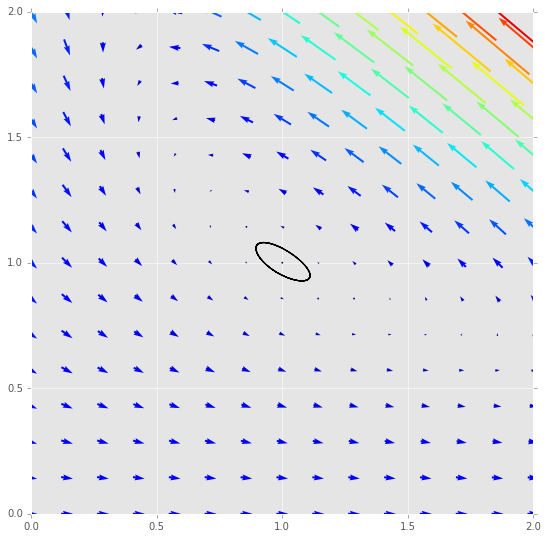

In [3]:
result = interact(pathField, v0=(0.9,1.105,0.005), k1=(0.9,1.105,0.005), k2=(0.9,1.105,0.005),
                  S0= (0.0, 2.005, 0.005), P0=(0.058,2.063,0.005),
                  tmax=30, tdelta=300)

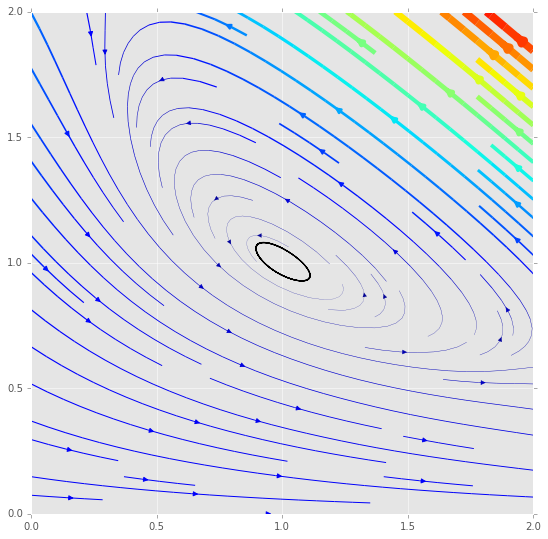

In [4]:
result = interact(pathFlow, v0=(0.9,1.105,0.005), k1=(0.9,1.105,0.005), k2=(0.9,1.105,0.005),
                  S0= (0.0, 2.005, 0.005), P0=(0.058,2.063,0.005),
                  tmax=30, tdelta=300)